# Exercise 7: Unsupervised Learning - Clustering
## Theory
### Task 1: MC
---
Multiple answers are possible.

**DBSCAN**
 - [x] can be used for outlier detection
 - [ ] works best with isotropic data
 - [ ] can be used to construct a KDTree
 - [ ] computes all possible pairwise distances

**K-means**
 - [x] guarantees convergence
 - [ ] is insensitive to outliers
 - [ ] can be used with a custom distance function 
 - [ ] All of the above

**Agglomerative HC**
 - [x] can be used with a custom distance function
 - [x] can be used with categorical data
 - [x] 's result can be used to visualize the distance matrix
 - [x] All of the above

**K-means**
 - [x] is fast in practice
 - [x] scales well with the dataset size
 - [ ] can be used for outlier detection
 - [ ] All of the above

**K-medoids**
 - [x] can be used with a custom distance function
 - [x] can be initialized with kmeans++ initialization
 - [x] computes centroids using the median
 - [x] All of the above

**Clustering Evaluation**
 - [ ] ```sklearn.metrics.silhouette_score``` is used to evaluate a clustering given the true (cluster) labels
 - [x] ```sklearn.metrics.silhouette_score``` is used to evaluate a clustering given the data ```X```
 - [ ] ```sklearn.metrics.rand_score``` computes differences for all possible pairs of points
 - [ ] ```sklearn.metrics.rand_score``` can also be used for classification


## Programming
### Task 1: KMeans
---
For this task you are given data ```X, y``` that is distributed around four centers. 
The goal of this exercise is to familiarize yourself with the pitfalls of K-mean (and its evaluation performance). Therefore

1. Plot X using a scatter plot, and color the data according to the labels
2. run KMeans with cluster sizes from 2 to 6 and this time plot the data using color according to the  prediction. 
3. Place both of these plots next to each other by first calling 
```fig, (ax1, ax2) = plt.subplots(1, 2)``` and then placing each plot on one axis

Follow this link for an example on how to use subplots (you have to sccroll down) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

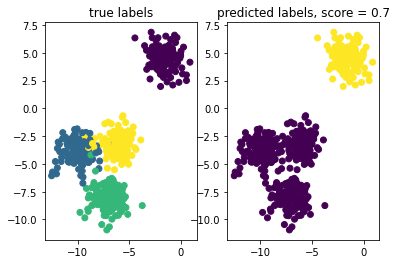

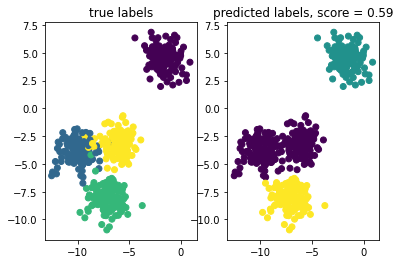

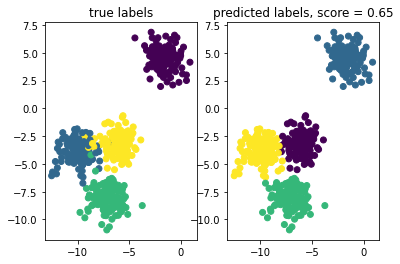

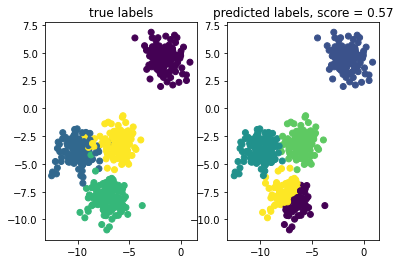

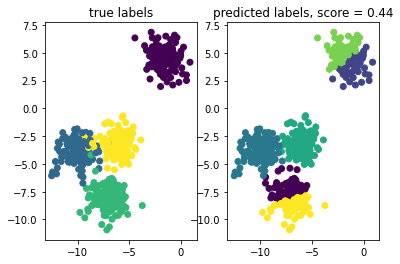

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500,
                  n_features=2,  # 2D data
                  centers=4,  # distributed in 4 clusters
                  cluster_std=1, # std deviation
                  center_box=(-10.0, 10.0), # xlim, ylim
                  shuffle=True,
                  random_state=1)

# Follow steps 1,2,3
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def do_ex_one():
  for n_clusters in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    ax1.set_title('true labels')
    ax1.scatter(X[:, 0], X[:, 1], c=y)
    ax2.set_title(f'predicted labels, score = {round(score, 2)}')
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()
do_ex_one()

The result should be as expected. Now add a score evaluation using the ```sklearn.metrics.silhouette_score``` to each of kmeans predictions. What can you conclude? 

**Answer:** The highest score is achieved with the wrong number of clusters (two instead of four). Be careful when evaluating K-means. Clustering methods in general are very hard to inspect, if you do not know the data really well.

**[Optional]** Refine the plots, by including axis titles  'true_clusters' and 'predicted_clusters' on each corresponding plot. For the axis corresponding to 'predicted_clusters', also add the silhouette_score value to the title. the results should look like this: 

<img src="img\exercise_one.png" alt="Drawing" style="width: 600px;"/>

Repeat the experiment, but with a anisotropically*1 scaled version of the previous dataset X and using only the correct number of clusters (four). For that, use the transformation ```transform = np.array([[1.6, -0.1], [1,-.5]]) ``` and use ```numpy.dot``` together with the original data to obtain the transformed version.

What can you conclude after using K-means on this scaled version of the original data?

**Answer**: K-means fails to cluster the scaled data, and that is because it assumes isotropic data.

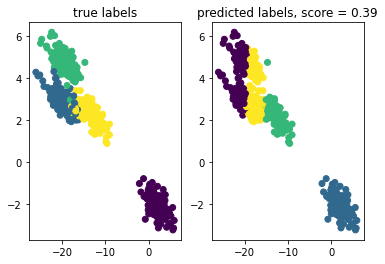

In [3]:
import numpy as np

def do_ex_two():
  transform = np.array([[1.6, -0.1], [1,-.5]])
  Xnew = np.dot(X, transform)
  kmeans = KMeans(n_clusters=4)

  fig, (ax1, ax2) = plt.subplots(1, 2)
  labels = kmeans.fit_predict(Xnew)
  score = silhouette_score(X, labels)
  ax1.set_title('true labels')
  ax1.scatter(Xnew[:, 0], Xnew[:, 1], c=y)
  ax2.set_title(f'predicted labels, score = {round(score, 2)}')
  ax2.scatter(Xnew[:, 0], Xnew[:, 1], c=labels)
  plt.show()

do_ex_two()  
# the weird anisotropic look of the kmeans result
# comes from the different scales of x and y

### Task 2: Agglomerative Clustering
---
The goal of this exercise is to show how you can enhance hierarchical clustering by using a matrix of neighborhoods, that will restrict computation of pairwise distances to only the connected neighbors.

For this exercise, you are given the ```S-curve``` dataset, which is used to show that clustering (or manifold-learning) algorithms preserve locality. We will see that in the default case, Agglomerative Clustering does not do so.


For that, you should
1. visualize the 3 dimensions of your data by calling ax.scatter3D.
   As a color map use plt.cm.Spectral
2. compute AgglomerativeClustering with n_clusters=8 and default linkage
3. repeat the plot, this time coloring the data according to the labels returned by the clustering
4. Now use AgglomerativeClustering again, but using the 'connectivity' argument. You should pass a ```kneighbors_graph``` of the data with ```n_neighbors=4```. By default, neighbors are computed using the euclidean distance. You should leave this default setting.
5. repeat the plot with labels colored according to the new clustering.

**What is different?**

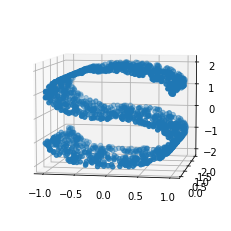

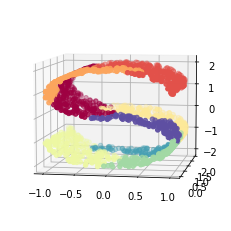

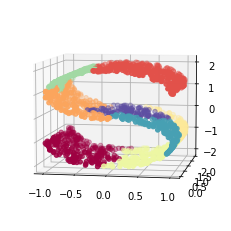

In [6]:
from sklearn.datasets import make_s_curve
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
# initialize plots using
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(7, -80)

# S-curve data
X, t = make_s_curve(1500, random_state=42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter3D(X[:,0], X[:,1], X[:,2], cmap=plt.cm.Spectral)
plt.show()

ac = AgglomerativeClustering(n_clusters=8, linkage='ward')  # war minimizes the variance of the clusters being merged
labels = ac.fit(X).labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=labels, cmap=plt.cm.Spectral)
plt.show()

# using kneighbor graph enforces locality
cm = kneighbors_graph(X, n_neighbors=4)  # 4 nearest neighbors according to euclidean distance
ac = AgglomerativeClustering(n_clusters=8, connectivity=cm, linkage='ward')  # war minimizes the variance of the clusters being merged
labels = ac.fit(X).labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=labels, cmap=plt.cm.Spectral)

import warnings
warnings.filterwarnings('ignore')


### [Optional] Tuning DBSCAN
---
Using what we have learned so far, find the combination of ```eps, min_samples``` that works well for the given dataset and explain what well could mean in this case.

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=750, centers=centers, cluster_std=0.5, random_state=42)